## 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as iplot
import cufflinks as cf

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

cf.go_offline()

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# 1.0 PCA Practical Implementation

## 1.1 Loading the 'Glass.data' dataset

In [2]:
# loading the `Glass.data` dataset

df = pd.read_csv("https://gist.githubusercontent.com/yifancui/e1d5ce0ba59ba0c275c0e2efed542a37/raw/dde7dbca24429542ff78964b83aaf064142dd771/data.csv")
df.head(10)

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


## 1.2 EDA and Preprocessing

### 1.2.1 Check for 'Null' values

In [3]:
# Checking for null vals

df.isna().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

**=>** No null values, whatsoever!

### 1.2.2 Having a bird-eye view of the dataset

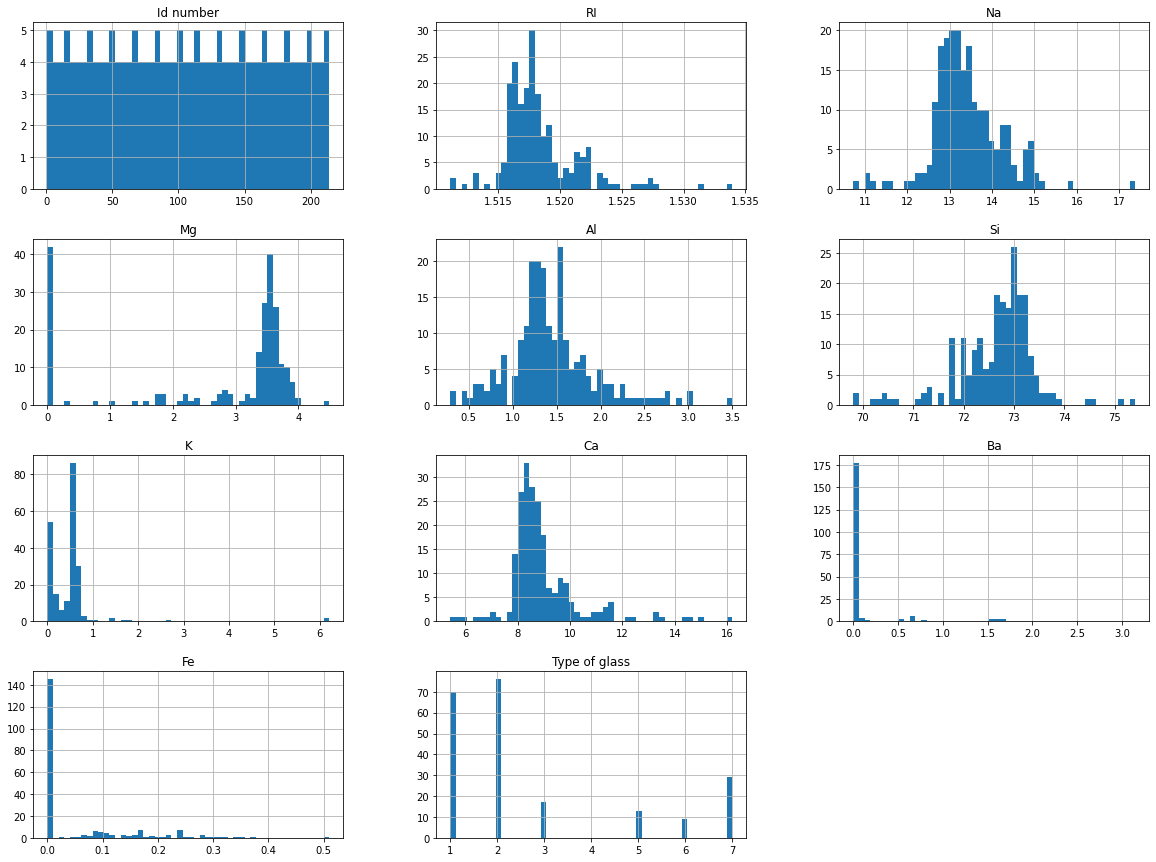

In [4]:
## bird-eye view of dataset's distributions

df.hist(bins=50, figsize=(20,15))
plt.show()

In [5]:
print(len(df.columns))

df.columns

11


Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

### 1.2.3 Keeping only the relevant features

In [6]:
### Picking the relevant columns

df1 = df.iloc[:, 1:10]
df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


### 1.2.4 'Parallel Translation' (essentially, Standardization) for implementing PCA

In [7]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)

df_scaled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [8]:
df_scaled.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.877449e-14,2.179980e-15,-2.801497e-16,-3.434428e-16,9.966067e-16,7.470660e-17,-3.137418e-16,-1.763906e-16,-6.121791e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


**=>** Standard Normalization done!

## 1.3 Dimensionality Reduction using PCA

In [9]:
pca  = PCA()
pcs = pd.DataFrame(pca.fit_transform(df_scaled))

pcs.head(10) # principal components

,0,1,2,3,4,5,6,7,8
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210,-0.395600,-0.197160,0.016346
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960,-0.024158,-0.284214,-0.010790
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630,-0.367518,-0.095941,0.021640
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805,-0.052497,-0.002959,0.092035
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032,0.158570,-0.191316,0.002315
5,-0.290267,-1.324008,0.868679,-0.927797,1.814661,-0.141222,-0.264286,0.032939,-0.001773
6,-0.252671,-1.116150,-0.540638,0.080328,-0.458523,0.256774,0.326612,-0.124233,-0.019143
7,-0.120299,-1.221846,-0.624742,-0.116022,-0.494575,0.383157,0.456985,-0.136349,-0.012303
8,-0.020816,-0.321933,-0.109060,1.371672,-0.375513,-0.315232,-0.118136,-0.263898,-0.023796
9,-0.002352,-1.065813,0.120855,-0.376021,0.449490,0.152030,-0.002042,-0.131190,-0.056027


**=>** by default 9 principal components are generated which makes no sense, so let's see how many pcs we do need via **Scree Plot**.

### 1.3.1 Computing EVR (Explained Variance Ratio) and plotting Scree Plot

Tells us the percentage of the variation in data explained by a given principal component.

In [10]:
# let's first compute the explained variance ratios

evrs = pca.explained_variance_ratio_
evrs

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

Text(0.5, 1.0, 'Screen Plot')

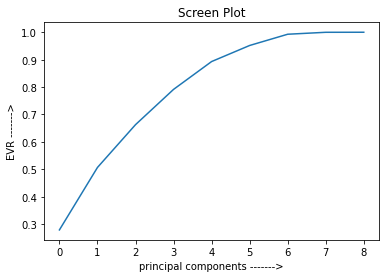

In [11]:
# Plotting the screen plot

sns.lineplot(data=evrs.cumsum())
plt.xlabel("principal components ------->")
plt.ylabel("EVR ------->")
plt.title("Screen Plot")

=> we needed only 5 PCs to explain the 95% of data. So let's go with it.

In [12]:
pca = PCA(n_components=5)
new_pcs = pd.DataFrame(pca.fit_transform(df_scaled), columns=["PC1", "PC2", "PC3", "PC4", "PC5"])

new_pcs

,PC1,PC2,PC3,PC4,PC5
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090
...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227
210,-2.397652,3.108236,-1.117502,0.288454,0.624723
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008


**Note**: Since user is not aware of what we are doing behind the scenes, be it

- **scaling the features** 

- or be it, **decomposing the features**.

Thus we are supposed to prepare a **data transformation pipeline** that does everything with the new data that we've had done with the training data, before feeding those instances to our finalized model.

In [13]:
print("Standard Scaler object: ", scaler)
print("Principal Component object: ", pca)

Standard Scaler object:  StandardScaler()
Principal Component object:  PCA(n_components=5)


## 1.4 Build a Model 

Buid a model after getting our new features (dimensionally reduced ones).

In [14]:
# features

X = new_pcs # new decomposed features
X.head()

,PC1,PC2,PC3,PC4,PC5
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090


In [15]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [16]:
# Labels

Y = df["Type of glass"]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type of glass, dtype: int64

### 1.4.1 Building a Decision Tree Classifier

In [17]:
# Building a Decision Tree classifier

mod = DecisionTreeClassifier(ccp_alpha=0.015)
mod.fit(X, Y)

DecisionTreeClassifier(ccp_alpha=0.015)

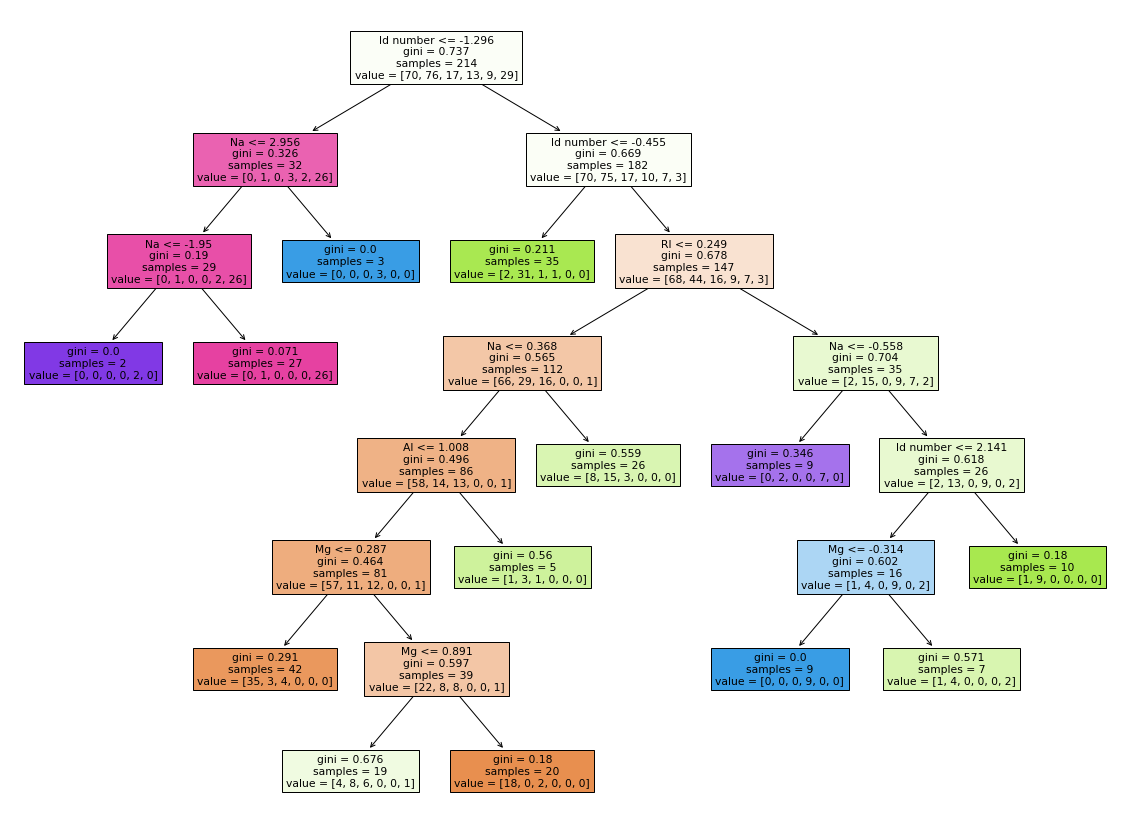

In [18]:
# Let's have a look at our decision tree

plt.figure(figsize=(20,15))
tree.plot_tree(mod, filled=True, feature_names=df.columns)
plt.show()

### 1.4.2 Classifer Evaluation

In [19]:
# Accuracy:

mod.score(X, Y)

0.794392523364486

## 1.5 Making Predictions

In [20]:
df.sample()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
166,167,1.52151,11.03,1.71,1.56,73.44,0.58,11.62,0.0,0.0,5


In [21]:
sample = np.array(df.sample().iloc[:, 1:-1])
sample

array([[ 1.52315, 13.44   ,  3.34   ,  1.23   , 72.38   ,  0.6    ,
         8.83   ,  0.     ,  0.     ]])

In [22]:
try:
    mod.predict(sample)
except Exception as e:
    print(e)

X has 9 features, but DecisionTreeClassifier is expecting 5 features as input.


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



=> That exactly was my point! We ought to do the exactly the same with prediction sample whatever we did with the features before feeding them into the model.

### 1.5.1 'Parallel Translation' of the instances on whom prediciton is to be made

In [23]:
sample_scaled = scaler.transform(sample)
sample_scaled

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[ 1.57919423,  0.03946213,  0.45549124, -0.43145108, -0.35061817,
         0.1582131 , -0.08942135, -0.35287683, -0.5864509 ]])

### 1.5.2 Decomposition of the instances on whom prediction is to be made

In [24]:
sample_dec = pca.transform(sample_scaled)
sample_dec

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



array([[ 1.06709874, -0.0714335 ,  0.05664307,  0.81958176, -0.69545005]])

### 1.5.3 Making friggin' predictions

In [25]:
mod.predict(sample_dec)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array([2], dtype=int64)

## 1.6 Custom function that implements the manual computation of Principal Components

In [35]:
# Create a function that implements the manual approach of computing the principal components

def getPCs(data=df):
    """
    returns the dataframe containing all the principal components of the argumented datasets.
    """
    # first and foremost, standard normalize the features
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(data)
    
    # Now, finding the eigen values & vectors
    sigma = df_scaled.T@df_scaled / df_scaled.shape[0] - 1
    eVal, eVec = np.linalg.eig(sigma)
    
    # Finding the principal components
    pcs = [sigma@eVec[i] for i in range(len(eVec))]
    
    col_names = [f"PC{i}" for i in range(1, len(pcs) + 1)]
    
    return pd.DataFrame(pcs, columns=col_names)

In [36]:
df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [37]:
# implementing the function to get the dataframe containing all Principal Components

getPCs(df1)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,1.121245,-0.522877,0.852386,-0.642947,-0.019534,0.242246,0.919247,-0.208804,0.600900
1,-1.459846,-1.625270,-1.027607,-1.668962,-1.273521,-1.049300,-1.441709,-2.021498,-1.265986
2,-0.196465,-0.365413,-1.429188,0.204435,-0.509265,-0.084173,-0.008313,0.249002,-0.727946
3,0.786879,0.946054,0.584890,0.112309,-0.006992,0.103483,0.509408,0.450078,-0.295707
4,-0.142802,-0.316035,-0.960048,-0.996283,-0.104745,-1.562149,0.025062,-0.463887,-0.461674
5,0.833716,-0.191481,-0.463342,-0.417934,-1.042693,-0.407564,0.719895,-0.224698,0.352075
6,-0.045003,-0.981910,-0.390467,-0.378976,-0.580012,-0.541637,0.007560,-0.593311,-0.386765
7,-2.068268,-1.800933,-2.029477,-1.743015,-2.455133,-1.943032,-2.396857,-1.422231,-1.770603
8,1.196683,1.354661,1.733046,1.327569,1.358697,1.456305,1.043334,1.256214,1.472041


In [38]:
df_scaled.shape[0] - 1

213